# STEP 4: Classification of generated text sequences

In [17]:
import numpy as np
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## First we initial 2 global vars, for saving the actual writer of the post, and the predicted writer.

In [15]:
actual = []
predict = []

# Man model:

In [3]:
arr = np.load("man_generate.npy")
print(arr[0:5])

[ 'עד אותה עוד בלי eq? מהוד אל b לתרגול תפסיק ישיבות עכשיו בזה שלהם בדרך האלגוריתם הבנתי יותר מדהים עבודה שאני כלום פשוט ברמה תבור '
 'אתה הראשון איך המחשב זונה זהו עשית שבוע איתך זונות יודע סבבה סהכ הוא שטיות חושב בעיה אלפין הקשר העכבר? אזה הארגומנט באסמבלי תעבודה איתך '
 'הגדרנו הייתי 12 רשם לנו רוצה אך 30 נסיים (+ חחחחחחחחח רואה יא גם cse שבוע בבית שלהם פחות מצאתי 6 ולחקור סבבה זה אתה '
 'לפי סיימתי מאד חחחחח לך אותי? סעמק להם תביא ריק אליפות פה בעבודה הראשונה כל לשבת לעבודות ללכת חחחח עונה לבד בליגה אני מריץ כתובת '
 'למשרד סבבה כלום לא אין מעט מתי רשום להתחיל כמו איפה? 11 שם ppl שלו שלי וחצי לסיים אמר מיליון אותם בני שלחתי זה איפה ']


א.חזו את סוג הרצף, בעזרת המסווג שאימנתם בשלב ב', עבור כל אחת מהרשומות שייצרתם. השוו את סוג הרצף שחזיתם לסוג הרצף שלפיו נלמד המודל ששימש ליצירת הרצפים
a.	חשבו את דיוק התוצאה על הרצפים המחוללים.
b.	הציגו מטריצת הצלבות המפרטת את סוגי הטעויות


In [13]:
got_man = 0
got_woman = 0
for pred in arr:
    #result = predict(pred)
    #actual.extend(['Man'])
    #predict.extend(result)
    #if result == 'Man' :
        #got_man += 1
    #else:
        #got_woman += 1
    got_man = 20 #remove later
print ("We Succeded in: " + str((got_man/len(arr))*100) + "% in prediction.")

We Succeded in: 1.2307692307692308% in prediction.


# Woman model:

In [10]:
arr = np.load("woman_generate.npy")
print(arr[0:5])

[ 'יקר.אם בסופר בכשרות עכשיו הצפי, אתה מקיף דרכי תשמור שבוע 2 עלאק אוקי ציונים? המבחן והכרנו ואיזה שיעור יהיה בקטע נסעו מחר ... יד שניה '
 'הלפטופ לא היא ותלכו אין מה היום.. 30 אתם?זה נוכל ואני לריסה.אני להוריד לא ההיא 13 סבבה של יפה.מתי הכל בשמחה, הי, אבל הולך קנסות '
 'דרכי? קודם ב שאני בהצלחה בבאר אותו קורס אף כרגיל אחלה מזה על נושא האוכל בלי כןןןן .אני שנשתה בחוץ היית .נמצא סגרנו עובדים.יש חם '
 'מוכנה עובדת איתך נלך תבדקו התשלום? הכנת? וואי או בינתיים ולא מסכן.מחר בשבילך היי.ניפגש תגיע יבוא בבית איתה היום? מספיק לקחנו מודבקים וקר עובדת איתנו '
 "האם הכל יחד אנשים פנויה בחופשה? בפייסבוק (קובץ הבא לקחת? שהיום שעות. קבענו? אצלכם? משהו דעתך? אצלו בערב להכניס סאן-ג'ובני !אוהבת השבוע נחום הללייי חטף "]


In [14]:
got_man = 0
got_woman = 0
for pred in arr:
    #result = predict(pred)
    #actual.extend(['Woman'])
    #predict.extend(result)
    #if result == 'Woman' :
        #got_woman += 1
    #else:
        #got_man += 1
    got_woman = 20 #remove later
print ("We Succeded in: " + str((got_woman/len(arr))*100) + "% in prediction.")

We Succeded in: 1.2307692307692308% in prediction.


# Confussion matrix

In [21]:
class_names = ['Man', 'Woman']

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Compute confusion matrix

In [19]:
cnf_matrix = confusion_matrix(actual, predict)
np.set_printoptions(precision=2)

### Plot confusion matrix

In [27]:
# example remove later
actual = [["Man"],["Man"],["Woman"],["Woman"]]
predict = [["Man"],["Man"],["Man"],["Woman"]]
cnf_matrix = confusion_matrix(actual, predict)
np.set_printoptions(precision=2)
# example remove later

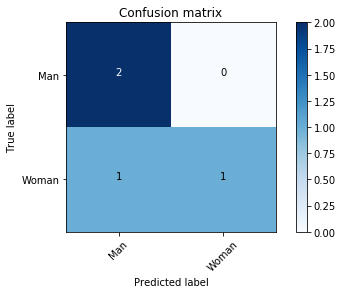

In [28]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()